**Analyzing Spotify Genres:** Claire Porier and Kristin Trapanese

https://claireporier.github.io/CMPS3160Milestone1.html

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
import nbconvert

In [33]:
%%shell
jupyter nbconvert --to html /content/CMPS3160Milestone1.ipynb

[NbConvertApp] Converting notebook /content/CMPS3160Milestone1.ipynb to html
[NbConvertApp] Writing 826986 bytes to /content/CMPS3160Milestone1.html


# Our Project

**Goals**

For our project, we will analyze spotify music datasets. We are looking into the genres and  subgenres that spotify uses and their correlation with danceability and energy. Spotify uses a lot of niche genres such as electro house, and neo mellow. We want to look at these sub-genres and analyze how spotify defines these genres.


**Datasets**

Our first dataset is Top10s.csv. We are working with this dataset because we want to analyze the most relevant songs of the decade. This dataset has the ID’s: title, artist, top genre, year, bpm, energy, danceability, liveliness, dB, valence, duration, acoustics, speechiness,energy,  and  popularity. Using this dataset we want to answer the question: how does spotify come up with their danceability rating? We will look at the correlation with bpm, dB and liveliness. Our visuals for the Top10s.csv are bar graphs for each genre. We choose this visual so that you can view the danceability, energy and other factors for each genre.

Our next dataset is spotify_songs.csv. We are using this dataset because it contains information on over thirty thousand songs that are streamed on spotify and has ID’s that correlate with our other datasets. This dataset has some of the same IDs as the Top10’s but also has sub-genres, instrumentalness, playlist name, acoustics, tempo. Using this dataset we want to answer the question how does the genre and subgenre correlate to the danceability and energy. Using both datasets we can analyze the correlation between danceability and the popularness of the song. With both datasets we can also see the correlation between the sub-genre and the energy, tempo, and danceability.

**Collaboration Plan:**

We are meeting in person to work on this project together. We plan to meet once a week, and more if necessary. We have made a shared google doc, and a shared google colab notebook, and a github repo so that we can better collaborate on the project.

# top10s.csv

In [12]:
top10s = pd.read_csv('https://raw.githubusercontent.com/claireporier/claireporier.github.io/main/top10s.csv' , encoding = 'latin-1')
top10s

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [13]:
top10s['top genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [25]:
top10s['genre'] = top10s['top genre'].map({
       'neo mellow':'other', 'detroit hip hop':'hip hop', 'dance pop':'pop', 'pop':'pop',
       'canadian pop':'pop', 'hip pop':'pop', 'barbadian pop':'pop', 'atl hip hop':'hip hop',
       'australian pop':'pop', 'indie pop':'pop', 'art pop':'pop', 'colombian pop':'pop',
       'big room':'other', 'british soul':'cultural', 'chicago rap':'rap', 'acoustic pop':'pop',
       'permanent wave':'other', 'boy band':'other', 'baroque pop':'pop', 'celtic rock':'rock',
       'electro':'edm', 'complextro':'edm', 'canadian hip hop':'hip hop', 'candy pop':'pop',
       'alaska indie':'indie', 'folk-pop':'pop', 'metropopolis':'pop', 'house':'edm',
       'australian hip hop':'hip hop', 'electropop':'pop', 'australian dance':'cultural',
       'hollywood':'other', 'canadian contemporary r&b':'r&b',
       'irish singer-songwriter':'cultural', 'tropical house':'edm', 'belgian edm':'edm',
       'french indie pop':'pop', 'hip hop':'hip hop', 'danish pop':'pop', 'latin':'cultural',
       'canadian latin':'cultural', 'electronic trap':'edm', 'edm':'edm', 'electro house':'edm',
       'downtempo':'other', 'brostep':'edm', 'contemporary country':'country', 'moroccan pop':'pop',
       'escape room':'other', 'alternative r&b':'r&b'
})

top10s['genre'].unique()

array(['other', 'hip hop', 'pop', 'cultural', 'rap', 'rock', 'edm',
       'indie', 'r&b', 'country'], dtype=object)

In [15]:
top10sGavg = top10s.groupby('genre').mean()
top10sGavg

<ipython-input-15-5e0b07ef38fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top10sGavg = top10s.groupby('genre').mean()


,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
genre,,,,,,,,,,,,
country,537.000000,2018.000000,86.000000,59.000000,47.000000,-6.000000,13.000000,50.000000,196.000000,3.000000,3.000000,76.000000
cultural,370.391304,2015.521739,123.782609,62.130435,55.521739,-7.695652,12.652174,46.956522,242.652174,27.043478,7.086957,61.130435
edm,402.333333,2016.208333,115.250000,72.791667,63.625000,-5.500000,14.375000,47.458333,219.083333,9.750000,7.041667,73.000000
hip hop,254.357143,2013.714286,97.928571,70.500000,68.928571,-6.142857,22.214286,42.571429,260.714286,15.214286,14.857143,63.857143
indie,208.000000,2013.000000,132.000000,34.000000,51.000000,-11.000000,12.000000,7.000000,250.000000,23.000000,3.000000,36.000000
other,306.023256,2014.744186,118.813953,68.581395,58.581395,-5.465116,15.976744,44.744186,214.488372,21.790698,5.627907,65.488372
pop,293.371134,2014.451546,118.934021,71.195876,65.461856,-5.445361,18.311340,54.187629,223.715464,13.298969,8.437113,66.383505
r&b,397.300000,2016.300000,127.900000,62.300000,58.100000,-6.600000,9.900000,34.200000,223.700000,15.000000,13.400000,78.300000
rap,64.000000,2011.000000,125.000000,69.000000,63.000000,-6.000000,67.000000,10.000000,379.000000,0.000000,20.000000,73.000000


<Axes: xlabel='genre'>

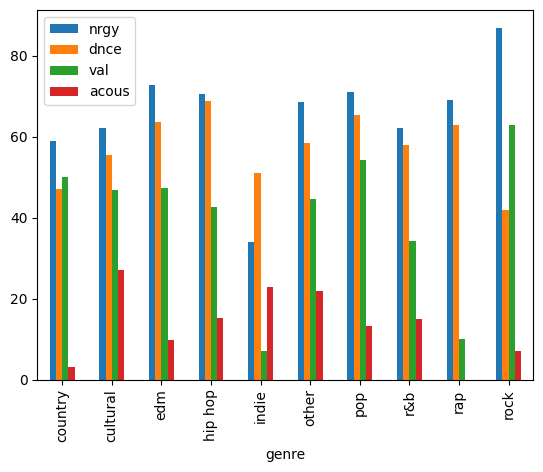

In [16]:
top10sGavg[['nrgy', 'dnce', 'val', 'acous']].plot.bar()

# Spotify_songs.csv

In [17]:
spotifySongs = pd.read_csv('https://raw.githubusercontent.com/claireporier/claireporier.github.io/main/spotify_songs.csv' , encoding = 'latin-1')
spotifySongs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,â¥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [26]:
spotifySongs.corr()

<ipython-input-26-341c380878f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spotifySongs.corr()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.064748,-0.109112,-0.000650,0.057687,0.010637,0.006819,0.085159,-0.149872,-0.054584,0.033231,-0.005378,-0.143682
danceability,0.064748,1.000000,-0.086073,0.011736,0.025335,-0.058647,0.181721,-0.024519,-0.008655,-0.123859,0.330523,-0.184084,-0.096879
energy,-0.109112,-0.086073,1.000000,0.010052,0.676625,-0.004800,-0.032150,-0.539745,0.033247,0.161223,0.151103,0.149951,0.012611
key,-0.000650,0.011736,0.010052,1.000000,0.000959,-0.174093,0.022607,0.004306,0.005968,0.002887,0.019914,-0.013370,0.015139
loudness,0.057687,0.025335,0.676625,0.000959,1.000000,-0.019289,0.010339,-0.361638,-0.147824,0.077613,0.053384,0.093767,-0.115058
mode,0.010637,-0.058647,-0.004800,-0.174093,-0.019289,1.000000,-0.063512,0.009415,-0.006741,-0.005549,0.002614,0.014329,0.015634
speechiness,0.006819,0.181721,-0.032150,0.022607,0.010339,-0.063512,1.000000,0.026092,-0.103424,0.055426,0.064659,0.044603,-0.089431
acousticness,0.085159,-0.024519,-0.539745,0.004306,-0.361638,0.009415,0.026092,1.000000,-0.006850,-0.077243,-0.016845,-0.112724,-0.081581
instrumentalness,-0.149872,-0.008655,0.033247,0.005968,-0.147824,-0.006741,-0.103424,-0.006850,1.000000,-0.005507,-0.175402,0.023335,0.063235
liveness,-0.054584,-0.123859,0.161223,0.002887,0.077613,-0.005549,0.055426,-0.077243,-0.005507,1.000000,-0.020560,0.021018,0.006138


<ipython-input-27-38912c8955c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  SScorrplot = sb.heatmap(spotifySongs.corr(), cmap="RdYlBu", annot=False)


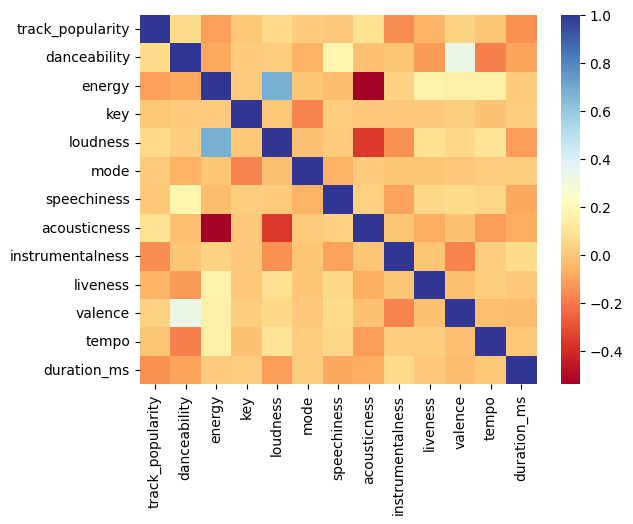

In [27]:
SScorrplot = sb.heatmap(spotifySongs.corr(), cmap="RdYlBu", annot=False)

# train_features.csv

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/claireporier/claireporier.github.io/main/train.csv' , encoding = 'latin-1')
train

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,CesÃ¡ria Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [ ]:
train.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

<ipython-input-60-c89e3effdab5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  traincorrplot = sb.heatmap(train.corr(), cmap="RdYlBu", annot=False)


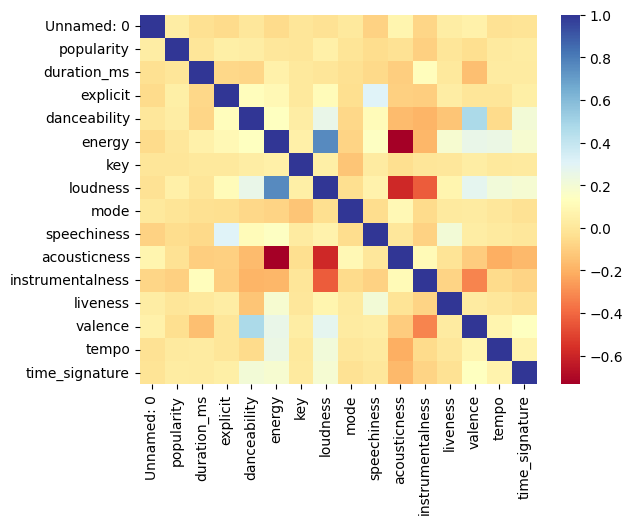

In [ ]:
traincorrplot = sb.heatmap(train.corr(), cmap="RdYlBu", annot=False)